In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Load training data
df = pd.read_csv("dna_training_data_augmented.csv")

# Step 2: Extract statistical features
def extract_features(seq):
    length = len(seq)
    return {
        "GC_Content": (seq.count("G") + seq.count("C")) / length,
        "A_freq": seq.count("A") / length,
        "T_freq": seq.count("T") / length,
        "C_freq": seq.count("C") / length,
        "G_freq": seq.count("G") / length,
    }

features = df["sequence"].apply(extract_features).apply(pd.Series)
X = features
y = df["label"]

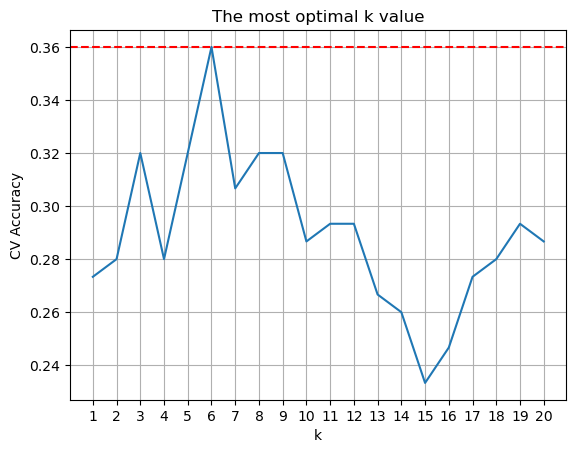

In [ ]:
# Example code: Select the optimal K
from sklearn.model_selection import cross_val_score
import numpy as np

k_range = range(1, 21)
scores = []
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, X, y, cv=3)
    scores.append(score.mean())

plt.plot(k_range, scores)
plt.xlabel("k")
plt.ylabel("CV Accuracy")
plt.title("The most optimal k value")
plt.xticks(k_range)
plt.grid()
plt.axhline(y=max(scores), color='r', linestyle='--')
plt.show()

In [ ]:
# Step 3: Split and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Using K-Nearest Neighbors for classification
model = KNeighborsClassifier(n_neighbors=6) # try with different k values (1, 3, 5) 
model.fit(X_train, y_train)

# Step 4: Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.3333333333333333


In [ ]:
# Step 5: Predict unknown sequences
test_df = pd.read_csv("dna_test_data_augmented.csv")

test_features = test_df["sequence"].apply(extract_features).apply(pd.Series)

test_predictions = model.predict(test_features)

# Display results
test_df["predicted_label"] = test_predictions
print(test_df[["sequence", "predicted_label"]])

                                             sequence predicted_label
0   CAAGCTTTTTCCGGTAGTTTAATTGCGATCTCGATCGGGAGACTGT...        promoter
1   TAATGGCCTTAAATAAACGGACCCCGCTACACCGAAGAGAGCCGGT...        promoter
2   GACGTAAATCGGTAGGGTTAATTACTCCCATGCTCAACCGTTTCGT...        enhancer
3   GATATCAGGATACACTGAACTGTTGATAGACGATGTGGCGAGGAGG...        promoter
4   AGTGGTACTCTCGACGTCTATTCCTCGGCTCCCCTAGAATGGTCAG...        enhancer
5   ACAGACCTGCTAAAAGTCTTGCGGGGATATCAAAAAGTAAGGCCAC...        enhancer
6   CAACCGTTCGAGCAAGAAAGCGGCATCTACGGCGAGTTTCACTGAT...        promoter
7   GATTGAAATCGTAACTGGCAGAGTCCGAGACTCCTCGTCATAATCA...        enhancer
8   TCAACGACTTCATTTATCGCTATATCTCTAGCTTTTCGAGGAAAAC...        enhancer
9   CGCTCTTTTTTGGGCGAGGTAAGTGGAAGGACTCACCGGTTATTCC...        promoter
10  AACGGTGACGCCTCGACAAGGGAAGTGAGATATGCCATCAGATGCA...        promoter
11  ATCGTGGGGAGTCAACCGGATGGCAGAGAATATGATCAACGTAGGT...        promoter
12  ATAAATGCCCAGGCAACCTATACCCAATGGATGGAATTAGGGTCAA...       noncoding
13  TCCGACCCAGAGCCGA

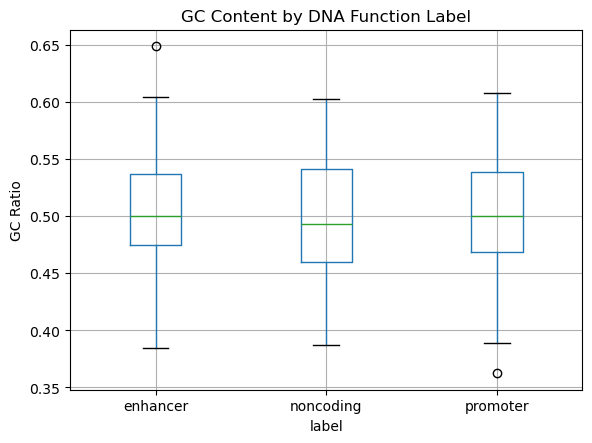

In [ ]:
# Step 6: Visualization
features["label"] = y
features.boxplot(column="GC_Content", by="label")
plt.title("GC Content by DNA Function Label")
plt.suptitle("")
plt.ylabel("GC Ratio")
plt.show()